In [20]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet
!pip install qiskit qiskit-aer --quiet

In [21]:
# ==========================================
# HADAMARD GATE VISUALIZATION & ANALYSIS
# Compatible with Qiskit 2.x
# ==========================================

# -------------------------
# Imports
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np


--- |0> ---
After Hadamard: [0.70710678+0.j 0.70710678+0.j]


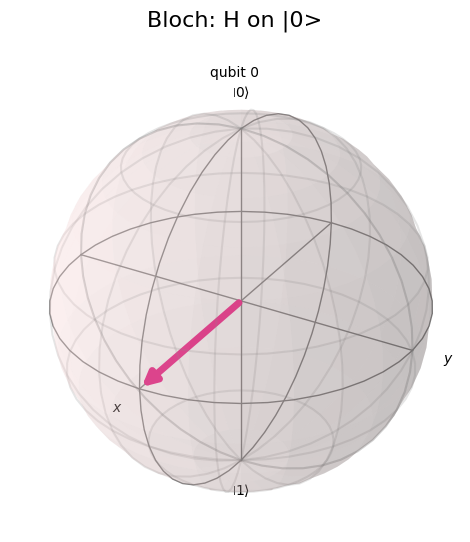

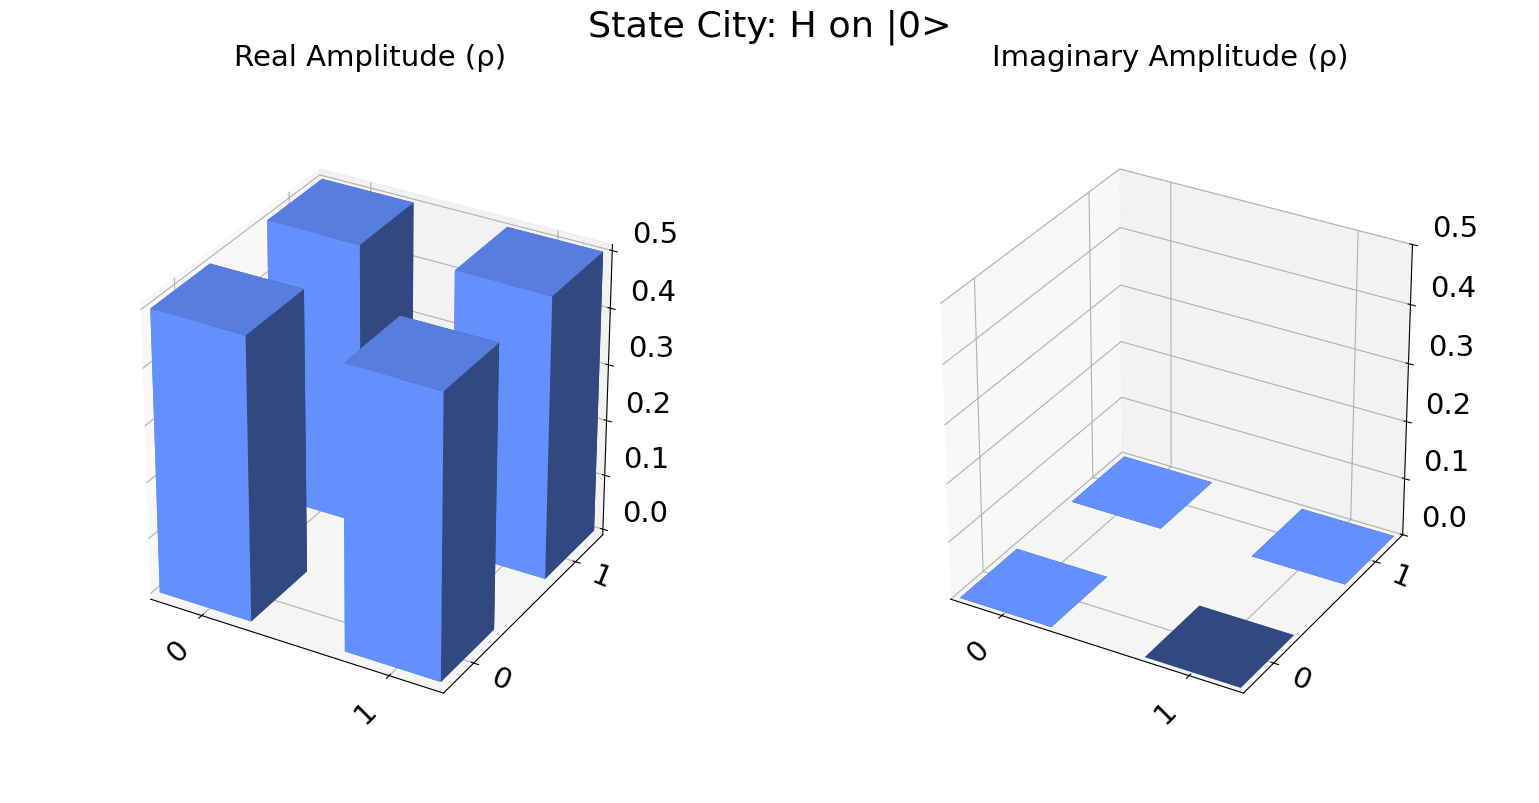

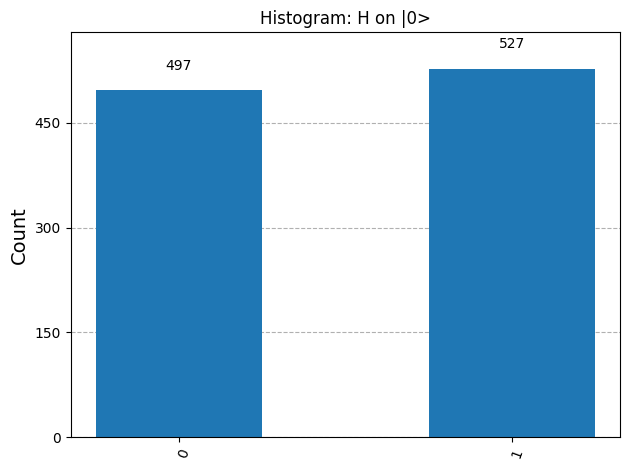



--- |1> ---
After Hadamard: [ 0.70710678+0.j -0.70710678+0.j]


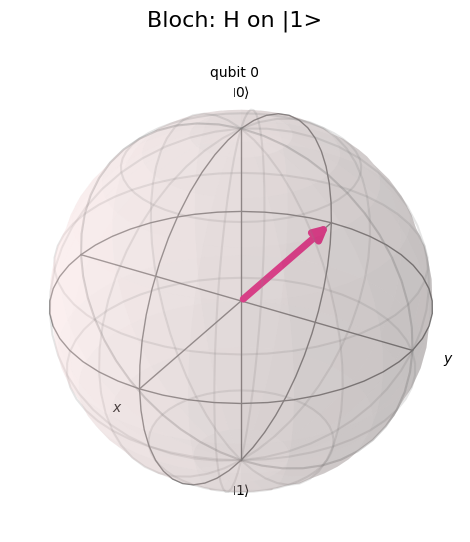

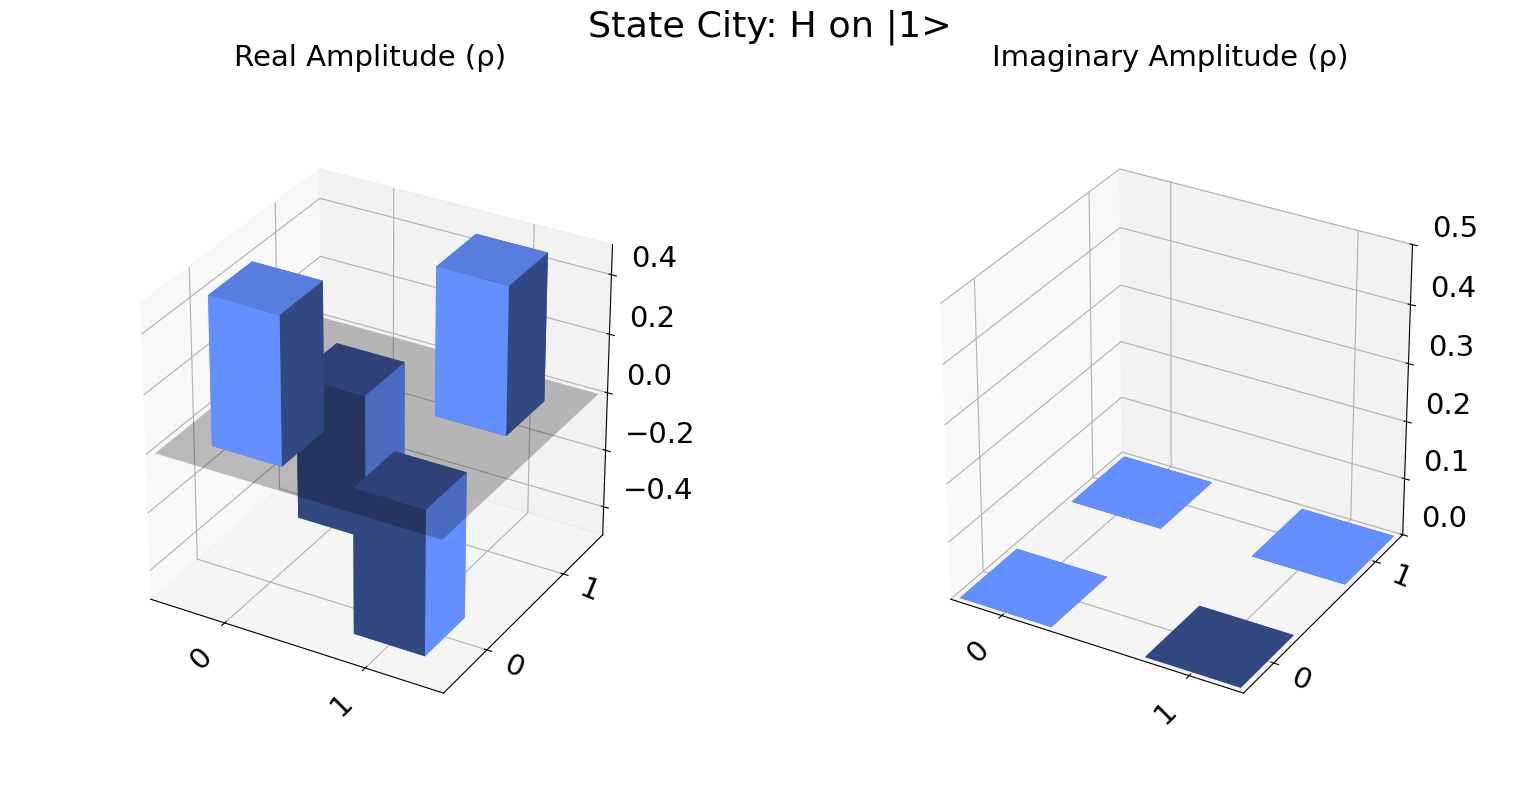

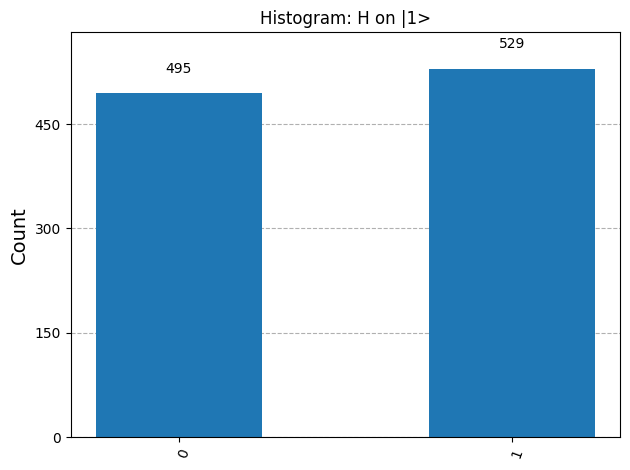



--- |+> ---
After Hadamard: [1.+0.j 0.+0.j]


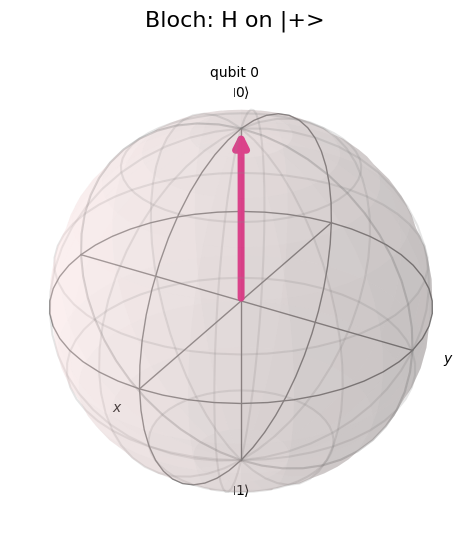

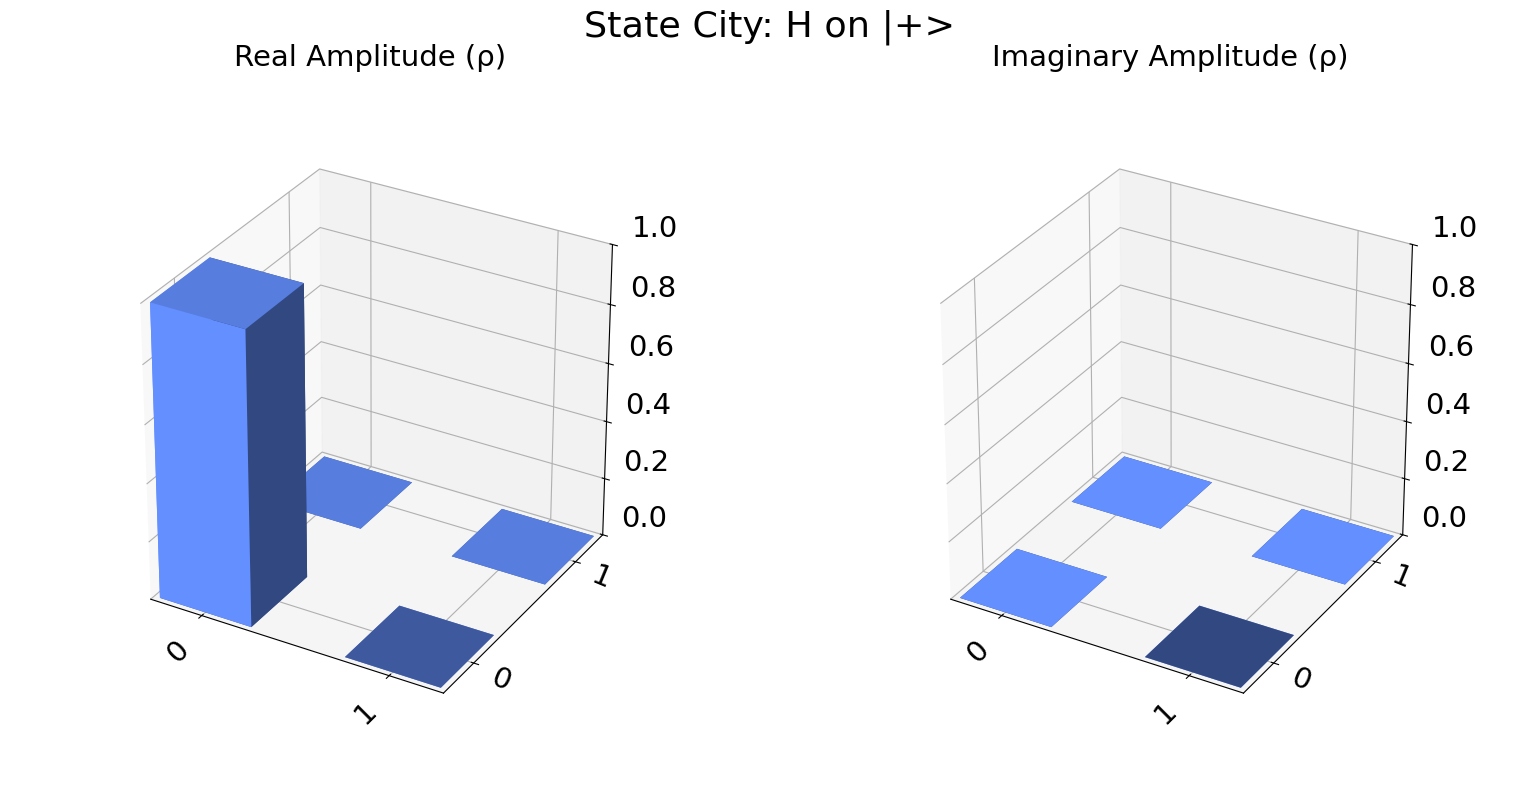

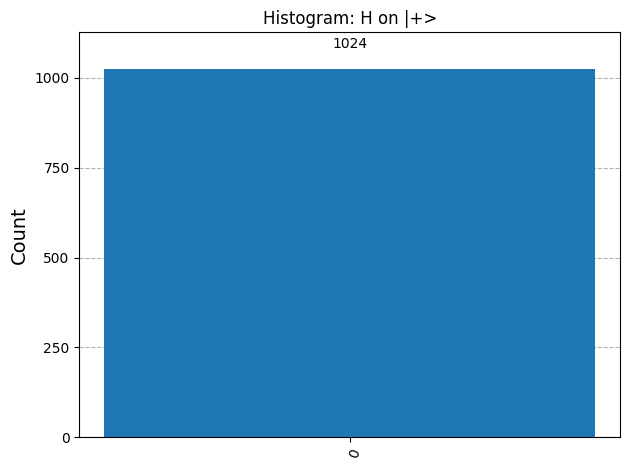



--- |-> ---
After Hadamard: [0.+0.j 1.+0.j]


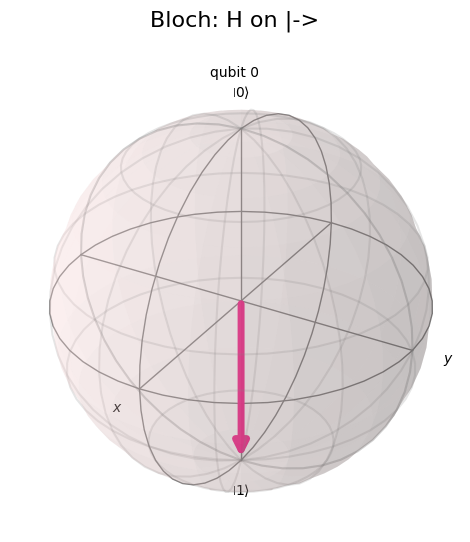

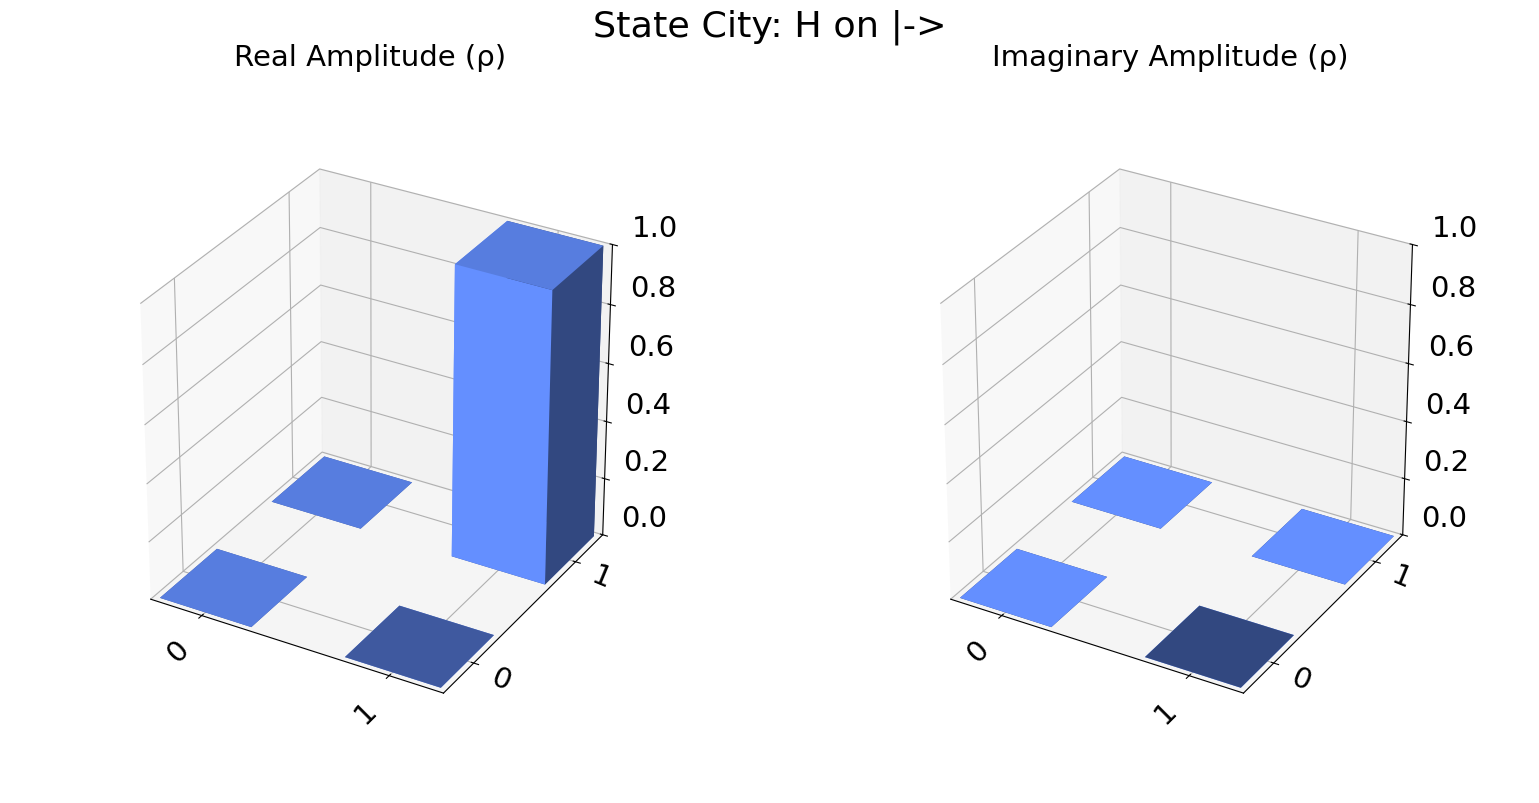

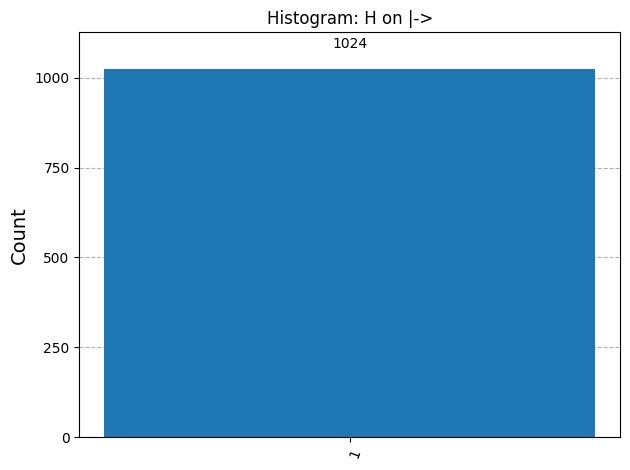

In [22]:
# -------------------------------------
# 1️⃣ Single-qubit Hadamard operations
# -------------------------------------
def visualize_hadamard(init_state_vector, label):
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("After Hadamard:", state_after.data)
    display(plot_bloch_multivector(state_after, title=f"Bloch: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Histogram: H on {label}"))
    print("\n")

# Run single-qubit tests
visualize_hadamard(np.array([1, 0]), "|0>")
visualize_hadamard(np.array([0, 1]), "|1>")
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")


Statevector (H⊗H⊗H on |000>): [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


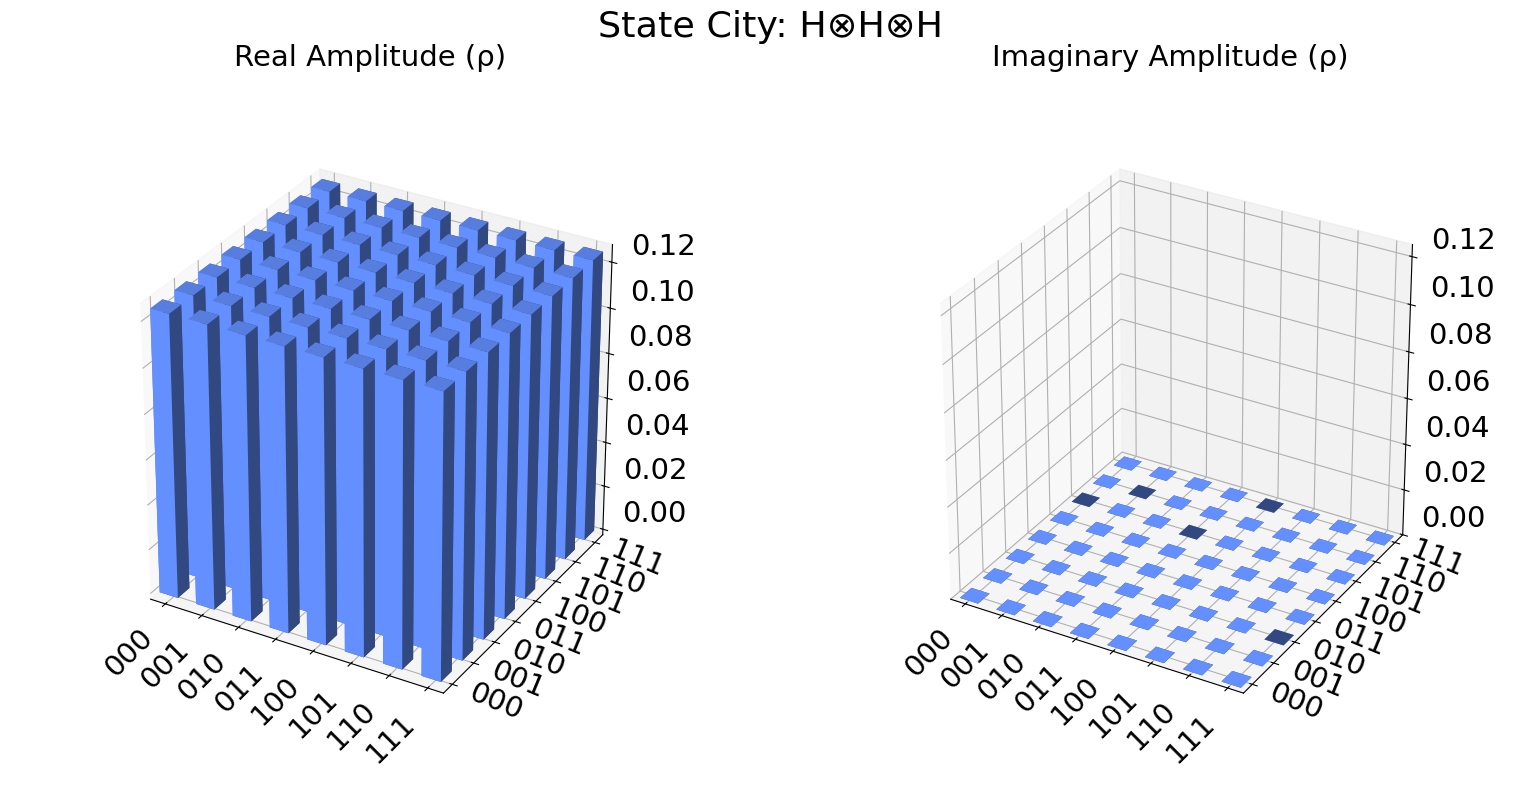

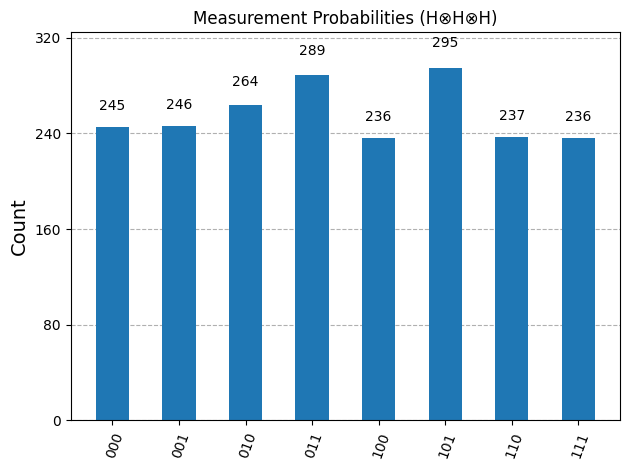

In [23]:
# -------------------------------------
# 2️⃣ Three-qubit H⊗H⊗H
# -------------------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city, plot_histogram
from qiskit_aer import AerSimulator

# Create 3-qubit circuit
qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

# Statevector (before measurement)
qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)
print("Statevector (H⊗H⊗H on |000>):", state3.data)
display(plot_state_city(state3, title="State City: H⊗H⊗H"))

# Simulation
sim = AerSimulator()
tqc3 = transpile(qc3, sim)
res3 = sim.run(tqc3, shots=2048).result()
counts3 = res3.get_counts()
display(plot_histogram(counts3, title="Measurement Probabilities (H⊗H⊗H)"))


GHZ statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


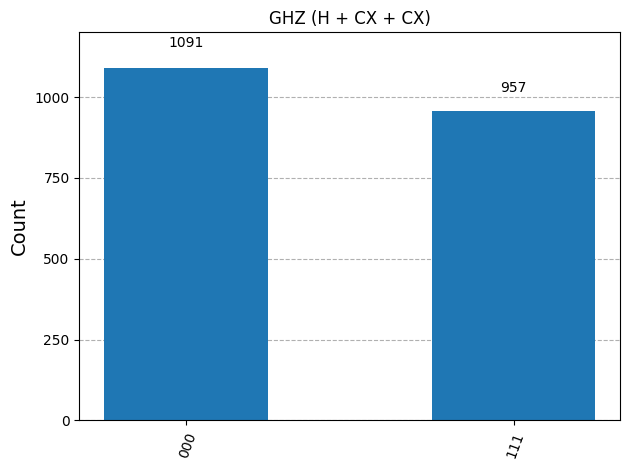

In [24]:
# -------------------------------------
# 3️⃣ H + CX + CX → GHZ correlations
# -------------------------------------
qc_ghz = QuantumCircuit(3, 3)
qc_ghz.h(0)
qc_ghz.cx(0, 1)
qc_ghz.cx(0, 2)
qc_ghz.measure([0, 1, 2], [0, 1, 2])

qc_sv = QuantumCircuit(3)
qc_sv.h(0)
qc_sv.cx(0, 1)
qc_sv.cx(0, 2)
state_ghz = Statevector.from_instruction(qc_sv)
print("GHZ statevector:", state_ghz.data)

sim = AerSimulator()
tqc_ghz = transpile(qc_ghz, sim)
res_ghz = sim.run(tqc_ghz, shots=2048).result()
counts_ghz = res_ghz.get_counts()
display(plot_histogram(counts_ghz, title="GHZ (H + CX + CX)"))


After H twice on |1>: [0.+0.j 1.+0.j]


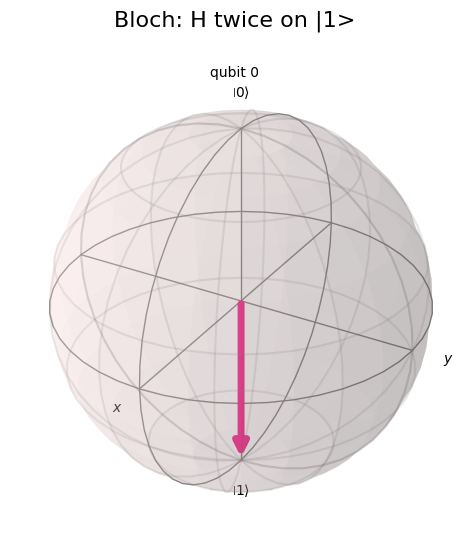

In [25]:
# -------------------------------------
# 4️⃣ Verify H twice on |1> → |1>
# -------------------------------------
qc_h2 = QuantumCircuit(1)
qc_h2.initialize([0, 1], 0)
qc_h2.h(0)
qc_h2.h(0)
state_h2 = Statevector.from_instruction(qc_h2)
print("After H twice on |1>:", state_h2.data)
display(plot_bloch_multivector(state_h2, title="Bloch: H twice on |1>"))


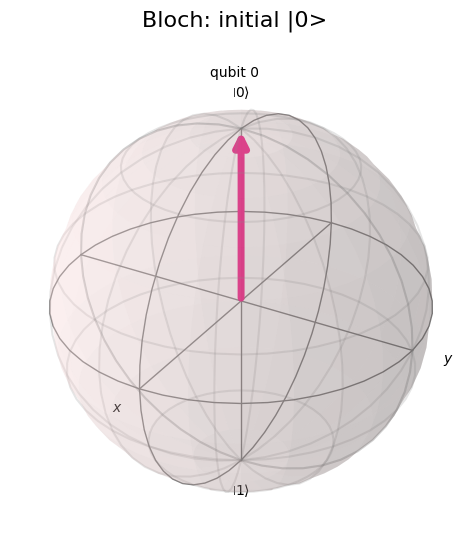

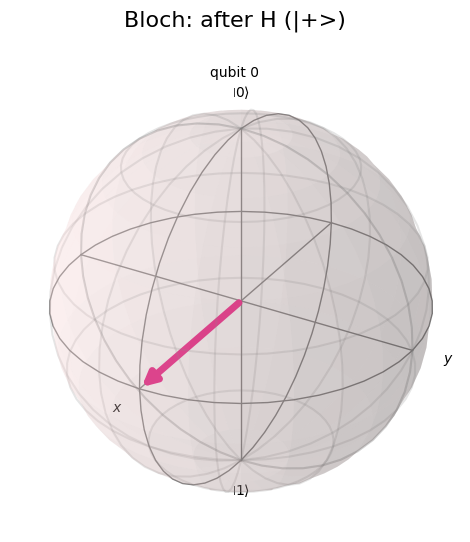

In [26]:
# -------------------------------------
# 5️⃣ Bloch visualization examples
# -------------------------------------
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# |0> initial state
sv0 = Statevector([1, 0])  # |0>

# Apply H to |0>
qc_h = QuantumCircuit(1)
qc_h.h(0)
sv_after = Statevector.from_instruction(qc_h)

# Plot Bloch spheres
display(plot_bloch_multivector(sv0, title="Bloch: initial |0>"))
display(plot_bloch_multivector(sv_after, title="Bloch: after H (|+>)"))